In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_preds = clf.predict(X_test)

In [12]:
clf.score(X_test, y_test)

0.8524590163934426

In [13]:
clf.score(X_train, y_train)

1.0

## Experimenting with different classification models

For this exercise, the model we're going to try and compare are:

* LinearSVC
* K Neighbors Classifier
* SVC 
* Logistic Regression
* RandomForestClassifier

In [15]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

To see which model works best:

1. Instanstiate each model in a directory
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on test data
5. Check the results

In [19]:
example_dict = {"RandomForestClassifier": RandomForestClassifier()}

models = {
    "LinearSVC": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier()
}

results = {}

In [20]:
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

example_results

{'RandomForestClassifier': 0.8360655737704918}

In [22]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

C:\Users\krish\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\krish\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\krish\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7868852459016393,
 'KNN': 0.5901639344262295,
 'SVC': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8524590163934426}

* The logisticRegression model has performed the best

* The results change every time we run the cell as we have not created a random seed yet

In [24]:
np.random.seed(42)

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

C:\Users\krish\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\krish\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\krish\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.6721311475409836,
 'KNN': 0.5901639344262295,
 'SVC': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8852459016393442}

<Axes: >

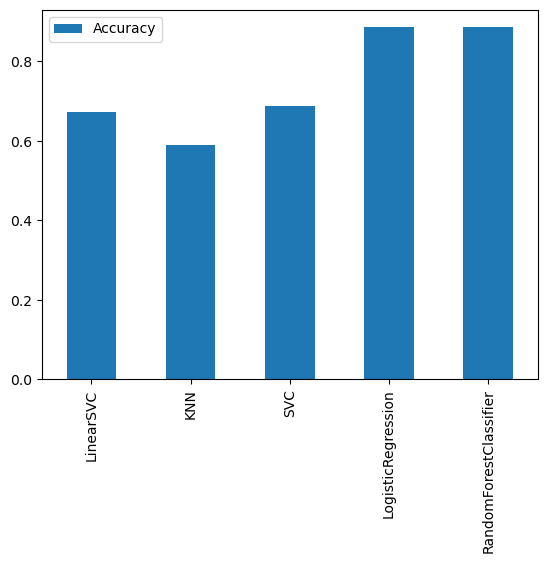

In [26]:
results_df = pd.DataFrame(results.values(), results.keys(), columns=["Accuracy"])

results_df.plot.bar()

## Hyperparameter Tuning 

In [27]:
# Different LogisticRegression hyperparameters
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

In [32]:
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_reg_grid,
    n_iter=5,
    cv=5,
    verbose=2
);

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solve

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

## Classifier Model Evaluation

* `Confusion Matrix` - Compares the predicted values with true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right.
* `Cross Validation` - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* `Precision`- Proportion of true values over totla number of samples. Higher precision leads to less false positives.
* `Recall`- Proportion of true positives over total number of true positives and false positives.
* `F1 Score` - Combines precision and recall into one metrics. 1 is best, 0 is worst.
* `Classification Report` - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precisio, recall and f1 score
* `ROC Curve` - Receiever Operating Characteristuc is a plot of TPR vs FPR.
* `Area Under Curve (AUC)` - The area underneath the ROC curve. A perfect modefl achieves a score of 1.0

In [38]:
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [58]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import RocCurveDisplay, roc_curve

In [59]:
y_preds = clf.predict(X_test)

In [60]:
confusion_matrix(y_test, y_preds)

array([[26,  6],
       [ 3, 26]], dtype=int64)

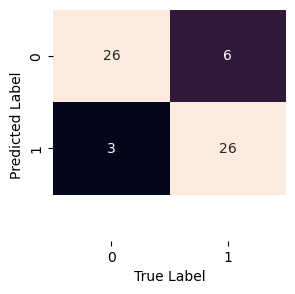

In [61]:
import seaborn as sns

def plot_conf_mat(y_test, y_preds):
    """
    PLot a confusion matrix using seaborn heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top)

plot_conf_mat(y_test, y_preds)
    

How about a classification report

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [63]:
precision_score(y_test, y_preds)

0.8125

In [64]:
recall_score(y_test, y_preds)

0.896551724137931

In [65]:
f1_score(y_test, y_preds)

0.8524590163934426

In [79]:
from sklearn.metrics import auc
y_probs = clf.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)
roc_auc = auc(fpr, tpr)

In [81]:
x = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example')

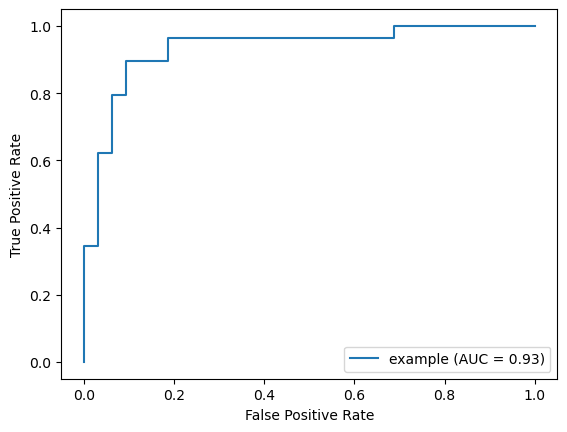

In [83]:
x.plot()

In [85]:
from sklearn.model_selection import cross_val_score

cross_val_arr = cross_val_score(clf, X, y, scoring="accuracy", cv=5)

In [87]:
cross_val_arr.mean()

0.8479781420765027

In [90]:
cross_val_pre = np.mean(cross_val_score(clf, X, y, scoring="precision", cv=5))
cross_val_pre

0.8215873015873015

In [91]:
cross_val_rec = np.mean(cross_val_score(clf, X, y, scoring="recall", cv=5))
cross_val_rec

0.9272727272727274

In [92]:
cross_val_f1 = np.mean(cross_val_score(clf, X, y, scoring="f1", cv=5))
cross_val_f1

0.8705403543192143

## Exporting and importing a trained model using pickle and joblib

In [93]:
# Import dump and load functions
from joblib import dump, load

In [94]:
dump(clf, "trained-classifier.joblib")

['trained-classifier.joblib']

In [95]:
loaded_clf = load("trained-classifier.joblib")
loaded_clf.score(X_test, y_test)

0.8524590163934426